In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, roc_curve, auc
import seaborn as sns

In [14]:
data = pd.read_csv("/content/kidney_stone_data.csv")
data.head()

,treatment,stone_size,success
0,B,large,1
1,A,large,1
2,A,large,0
3,A,large,1
4,A,large,1


In [15]:
X = data.iloc[:, 0:2]
y = data.iloc[:, 2]

In [16]:
print("Unique values for stone_size:", X['stone_size'].unique())
print("Unique values for treatment:", X['treatment'].unique())

Unique values for stone_size: ['large' 'small']
Unique values for treatment: ['B' 'A']


In [17]:
le = LabelEncoder()
X['stone_size'] = le.fit_transform(X['stone_size'])
X['treatment'] = le.fit_transform(X['treatment'])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [20]:
y_pred = classifier.predict(X_test)

In [21]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[  0  29]
 [  0 111]]


In [22]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")

Precision: 0.7928571428571428
Recall: 1.0
Accuracy: 0.7928571428571428


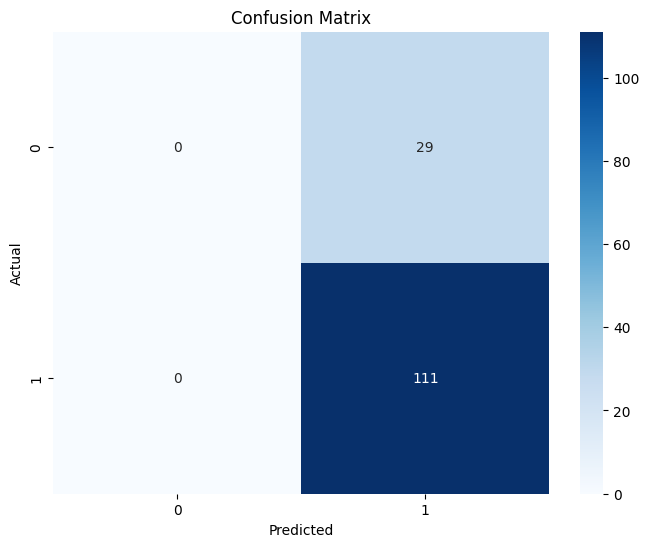

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

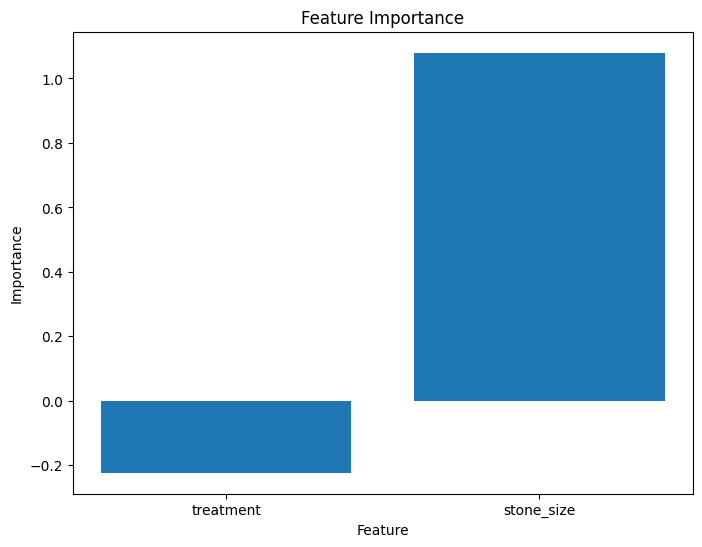

In [24]:
importance = classifier.coef_[0]
plt.figure(figsize=(8,6))
plt.bar(X.columns, importance)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

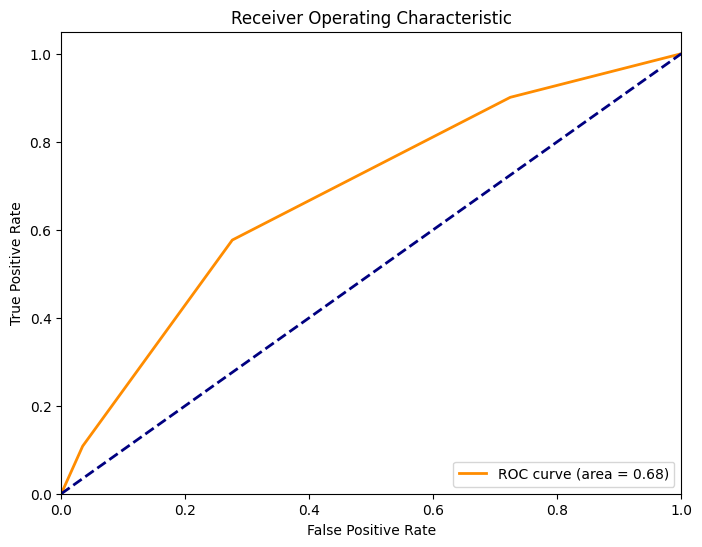

In [25]:
fpr, tpr, _ = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [27]:
cv_scores = cross_val_score(classifier, X, y, cv=5)
average_cv_score = cv_scores.mean()

In [28]:
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions_df.to_csv('predictions.csv', index=False)

In [29]:
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'Accuracy', 'Average Cross-Validation Score'],
    'Score': [precision, recall, accuracy, average_cv_score]
})
metrics_df.to_csv('evaluation_metrics.csv', index=False)

In [30]:
print("Predictions and evaluation metrics have been saved to 'predictions.csv' and 'evaluation_metrics.csv' respectively.")

Predictions and evaluation metrics have been saved to 'predictions.csv' and 'evaluation_metrics.csv' respectively.
